# IEOR 4571 - Personalization - Final Project

#### Team members: 
Name, UNI/email, Github ID
* Megala Kannan, msk2245@columbia.edu, thisismeg
* Hojin Lee, hl3328@columbia.edu, hjlee9295
* Jung Ah Shin, js5569@columbia.edu, juliajungahshin
* Tiffany Zhu, tz2196@columbia.edu, tlzhu19


# TOC:
* [1. Introduction](#1)
* [2. Data Exploration](#2)
* [3. Modeling](#3)
    * [3.1 Baseline Model](#3-1)
    * [3.2 Something](#3-2)
* [4. Evaluation](#4)
    * [4.1 Accuracy](#4-1)
    * [4.2 Coverage](#4-2)
* [5. Conclusion](#5)


# 1. Introduction <a class="anchor" id="1"></a>

# 2. Data Exploration <a class="anchor" id="2"></a>

In [1]:
import pandas as pd
import json
from tqdm import tqdm

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")


In [2]:
def convert_json_to_df(path, file_name, column_names):
    line_count = len(open(path + file_name).readlines())    
    columns_dict = {name: [] for name in column_names}

    with open(path + file_name) as f:
        for line in tqdm(f, total=line_count):
            blob = json.loads(line)
            
            for key in column_names:
                columns_dict[key].append(blob[key])
    
    return pd.DataFrame(columns_dict)

In [3]:
path = "/Users/hojinlee/Documents/Columbia/2019/Class/Personalization/HW/final/yelp_dataset/"
file_name = "review.json"

In [4]:
# review.json
ratings = convert_json_to_df(path, file_name, ['user_id', 'business_id', 'stars', 'date'])

user_counts = ratings["user_id"].value_counts()
active_users = user_counts.loc[user_counts >= 5].index.tolist()

100%|██████████| 6685900/6685900 [00:56<00:00, 117571.50it/s]


In [5]:
ratings.rename(columns={'stars': 'rating'}, inplace=True)
ratings.head()

,user_id,business_id,rating,date
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,2013-05-07 04:34:36
1,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,2017-01-14 21:30:33
2,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,2016-11-09 20:09:03
3,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,2018-01-09 20:56:38
4,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,2018-01-30 23:07:38


In [6]:
# can do the same for business.json, user.json, tip.json 
# for metadata info see https://www.yelp.com/dataset/documentation/main

In [105]:
# business.json
# todo: how to add 'attributes'?
'''
"attributes": {
        "RestaurantsTakeOut": true,
        "BusinessParking": {
            "garage": false,
            "street": true,
            "validated": false,
            "lot": false,
            "valet": false
        },
'''

businesses = convert_json_to_df(path, 'business.json', ['business_id', 'name', 'city', 'state', 'stars', 
                                                        'review_count', 'is_open', 'attributes', 
                                                        'categories', 'hours','latitude','longitude'])



100%|██████████| 192609/192609 [00:03<00:00, 50267.73it/s]


In [8]:
businesses.head()

,business_id,city,state,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Phoenix,AZ,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Mississauga,ON,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Charlotte,NC,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Goodyear,AZ,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Charlotte,NC,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [9]:
# user.json
users = convert_json_to_df(path, 'user.json', ['user_id', 'review_count', 'friends', 'useful', 
                                               'funny', 'cool', 'fans', 'elite', 'average_stars', 
                                               'compliment_hot', 'compliment_more', 'compliment_profile',
                                               'compliment_cute', 'compliment_list', 'compliment_note',
                                               'compliment_plain', 'compliment_cool', 'compliment_funny',
                                               'compliment_writer', 'compliment_photos'
                                              ])

100%|██████████| 1637138/1637138 [00:26<00:00, 61525.63it/s]


In [10]:
# tip.json
tips =  convert_json_to_df(path, 'tip.json', ['text', 'date', 'compliment_count', 'business_id', 'user_id'])

100%|██████████| 1223094/1223094 [00:06<00:00, 186222.20it/s]


In [11]:
photos = convert_json_to_df(path, 'photo.json', ['photo_id', 'business_id'])

100%|██████████| 200000/200000 [00:00<00:00, 221216.70it/s]


In [12]:
users.head()

,user_id,review_count,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,95,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",84,17,25,5,"2015,2016,2017",4.03,2,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,33,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",48,22,16,4,,3.63,1,0,0,0,0,0,0,1,1,0,0
2,bc8C_eETBWL0olvFSJJd0w,16,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",28,8,10,0,,3.71,0,0,0,0,0,1,0,0,0,0,0
3,dD0gZpBctWGdWo9WlGuhlA,17,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",30,4,14,5,,4.85,1,0,0,0,0,0,2,0,0,1,0
4,MM4RJAeH6yuaN8oZDSt0RA,361,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",1114,279,665,39,"2015,2016,2017,2018",4.08,28,1,0,0,1,16,57,80,80,25,5


In [13]:
len(users[users['review_count']>=5])

861695

In [14]:
len(ratings) #6685900
ratings.head()

,user_id,business_id,rating,date
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,2013-05-07 04:34:36
1,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,2017-01-14 21:30:33
2,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,2016-11-09 20:09:03
3,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,2018-01-09 20:56:38
4,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,2018-01-30 23:07:38


In [82]:
import datetime as dt

ratings['date'] = pd.to_datetime(ratings['date']).dt.date

#time series
df = ratings.merge(businesses[['business_id','state']], how='left', right_on='business_id', left_on='business_id')
df['month'] = df['date'].apply(lambda x: x.strftime('%Y%m'))
time_series_by_state = df[['state','rating','month']].groupby(['state','month']).mean().reset_index()
df = time_series_by_state.pivot(index='month', columns='state', values='rating')
df.fillna(values='0').head()



TypeError: fillna() got an unexpected keyword argument 'values'

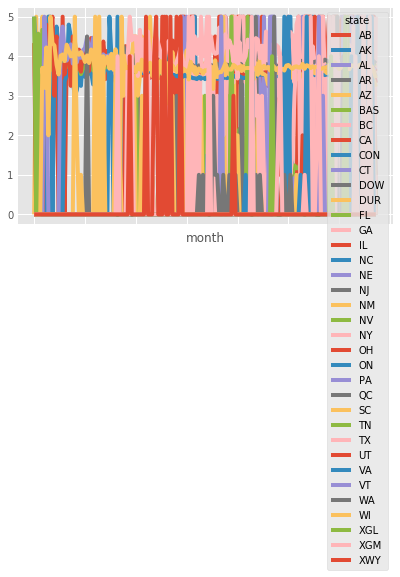

In [87]:
df.fillna(0).plot.line()

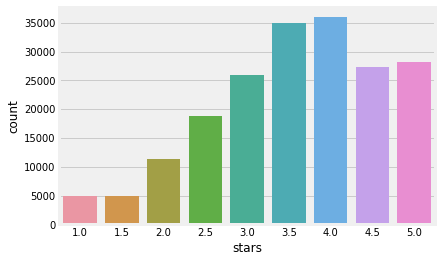

In [17]:
sns.countplot(x='stars',data=businesses);

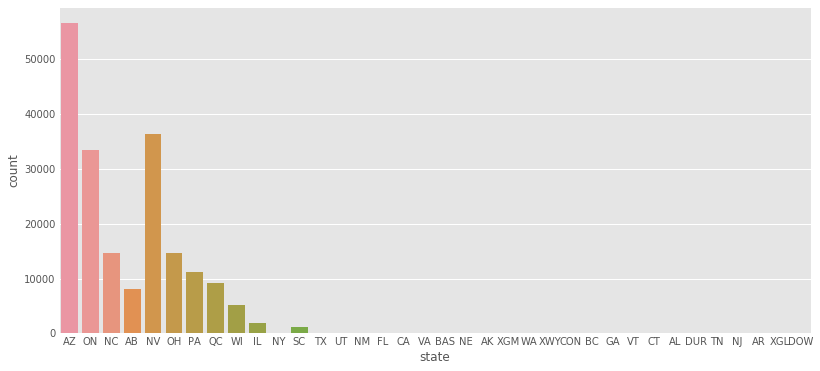

In [91]:
# uneven distribution of data among states -> cannot apply Location Aware Recommender System.
groupby_state = businesses[['state','business_id']].groupby('state').count().reset_index().sort_values(by='business_id',ascending=False)

plt.figure(figsize=(12,6))
sns.countplot(x='state',data=businesses)


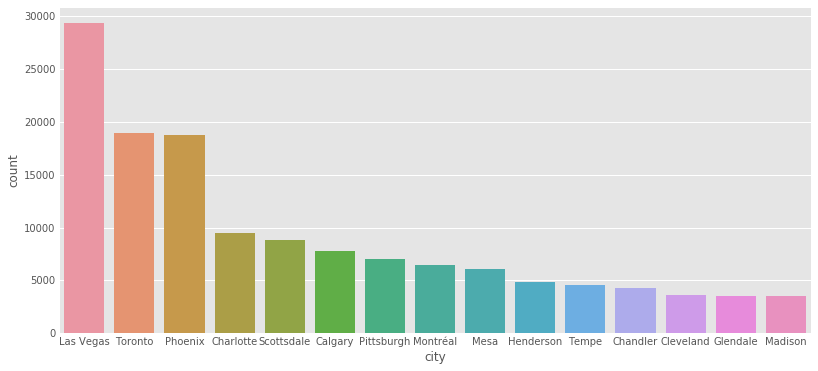

In [98]:
plt.figure(figsize=(12,6))
sns.countplot(x='city',data=businesses, order=pd.value_counts(businesses['city']).iloc[:15].index)



In [99]:
sns.distplot(businesses['review_count'].apply(np.nplogp1))

AttributeError: module 'numpy' has no attribute 'nplogp1'

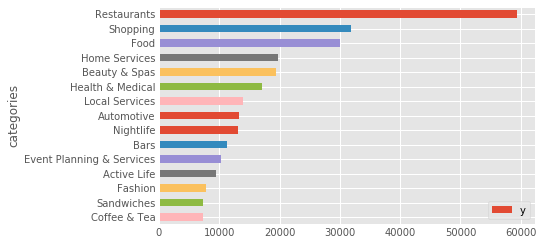

In [76]:
catList = []
businesses['categories'].fillna(value='',inplace=True)
businesses['cat'] = businesses['categories'].apply(lambda x: x.split(','))
catList.extend(businesses['cat'])
merged = [x.strip() for x in list(itertools.chain(*catList))]

mostCommon = Counter(merged).most_common(15)
mostCommonKeys = [x for x in list(itertools.chain(*mostCommon)) if type(x) != int]
mostCommonValues = [x for x in list(itertools.chain(*mostCommon)) if type(x) == int]

df = pd.DataFrame({'y': mostCommonValues, 'categories': mostCommonKeys})
ax = df.plot.barh(x='categories', y='y')
ax.invert_yaxis()




In [ ]:
df = ratings.merge(businesses[['business_id', 'name']], on='business_id')
plt.figure(figsize=(12,6))

chart = sns.countplot(x='name',data=df, order=pd.value_counts(df['name']).iloc[:-10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


[Text(0, 0, 'Starbucks'),
 Text(0, 0, "McDonald's"),
 Text(0, 0, 'Hash House A Go Go'),
 Text(0, 0, 'Chipotle Mexican Grill'),
 Text(0, 0, 'Mon Ami Gabi'),
 Text(0, 0, 'Bacchanal Buffet'),
 Text(0, 0, 'Buffalo Wild Wings'),
 Text(0, 0, 'In-N-Out Burger'),
 Text(0, 0, 'Wicked Spoon'),
 Text(0, 0, 'Panera Bread'),
 Text(0, 0, "Denny's"),
 Text(0, 0, 'Subway'),
 Text(0, 0, 'The Cheesecake Factory'),
 Text(0, 0, "Dunkin' Donuts"),
 Text(0, 0, 'Earl of Sandwich'),
 Text(0, 0, 'Yard House'),
 Text(0, 0, "Oregano's Pizza Bistro"),
 Text(0, 0, "Grimaldi's Pizzeria"),
 Text(0, 0, 'Discount Tire'),
 Text(0, 0, 'Gordon Ramsay BurGR'),
 Text(0, 0, 'Tacos El Gordo'),
 Text(0, 0, 'Taco Bell'),
 Text(0, 0, 'Olive Garden Italian Restaurant'),
 Text(0, 0, 'Shake Shack'),
 Text(0, 0, 'Walmart Supercenter'),
 Text(0, 0, 'Pita Jungle'),
 Text(0, 0, 'Smashburger'),
 Text(0, 0, 'IHOP'),
 Text(0, 0, 'Bachi Burger'),
 Text(0, 0, 'Red Robin Gourmet Burgers'),
 Text(0, 0, 'Egg Works'),
 Text(0, 0, 'Five Guys'),

In [107]:
businesses.head()

,business_id,name,city,state,stars,review_count,is_open,attributes,categories,hours,latitude,longitude
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,Phoenix,AZ,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None,33.522143,-112.018481
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",43.605499,-79.652289
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,Charlotte,NC,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",35.092564,-80.859132
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,Goodyear,AZ,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",33.455613,-112.395596
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,Charlotte,NC,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",35.190012,-80.887223


In [20]:
import numpy as np
active_user_only_ratings_df = ratings[ratings['user_id'].isin(active_users)]

sample_size = [50000,60000,100000]

for i in range(5):
    print(i)
    
    for s in sample_size:
        sampleUID = active_user_only_ratings_df['user_id'].unique()[np.random.randint(active_user_only_ratings_df['user_id'].unique().shape[0], size=s)]
        active_user_only_ratings_df_sample = active_user_only_ratings_df[active_user_only_ratings_df['user_id'].isin(sampleUID)]

        print('sample size', s)
        print('data set size', len(active_user_only_ratings_df_sample))
        print('-----------')
    


0
sample size 50000
data set size 726770
-----------
sample size 60000
data set size 866795
-----------
sample size 100000
data set size 1326392
-----------
1
sample size 50000
data set size 730127
-----------
sample size 60000
data set size 852236
-----------
sample size 100000
data set size 1337162
-----------
2
sample size 50000
data set size 718582
-----------
sample size 60000
data set size 861873
-----------
sample size 100000
data set size 1328920
-----------
3
sample size 50000
data set size 722330
-----------
sample size 60000
data set size 867248
-----------
sample size 100000
data set size 1338800
-----------
4
sample size 50000
data set size 737627
-----------
sample size 60000
data set size 857514
-----------
sample size 100000
data set size 1347990
-----------


In [21]:
### baby data set Test

In [22]:
active_user_only_ratings_df = ratings[ratings['user_id'].isin(active_users)]

sample_size = [100]

for s in sample_size:
    sampleUID = active_user_only_ratings_df['user_id'].unique()[np.random.randint(active_user_only_ratings_df['user_id'].unique().shape[0], size=s)]
    active_user_only_ratings_df_sample = active_user_only_ratings_df[active_user_only_ratings_df['user_id'].isin(sampleUID)]



In [79]:
import itertools
from collections import Counter

base_df = active_user_only_ratings_df_sample

#sparse alert - hopefully with bigger dataset, we will see some weird ratings..
real_average = base_df[['business_id','rating']].groupby('business_id').mean().reset_index()
real_average.rename(columns={"rating": "average_business_rating"}, inplace=True)

#Average ratings for business added
base_df = base_df.merge(real_average, how='left', on='business_id')

#one-hot encoding for top5 categories
catList = []
businesses['categories'].fillna(value='',inplace=True)
businesses['cat'] = businesses['categories'].apply(lambda x: x.split(','))
catList.extend(businesses['cat'])
merged = [x.strip() for x in list(itertools.chain(*catList))]

#Adding state, review_count, is_open
base_df = base_df.merge(businesses[['business_id','state','city','latitude','longitude', 'review_count','is_open', 'hours', 'cat']], on='business_id')
base_df.rename(columns={"review_count": "business_review_count"}, inplace=True)

#getting top 5 common categories items
top5List = [x for x in list(itertools.chain(*Counter(merged).most_common(5))) if type(x) != int]

#one-hot encoding if the business in top 5 common category
for item in top5List:
    base_df[item] = base_df['cat'].apply(lambda categories: 'Y' if bool(set([y.strip() for y in categories]).intersection([item])) else 'N')
    #base_df[item] = base_df['cat'].apply(lambda categories: 'Y' if bool(set([y.strip() for y in categories]).intersection(set(item))) else 'N')

# is_open (categorical) change from 1 and 0 to Y and N
base_df['is_open'] = base_df['is_open'].apply(lambda x: 'Y' if x else 'N')

# hours: how many days per week it's open
base_df['hours'] = base_df['hours'].apply(lambda x: len(x.keys()) if x else 0)
base_df.rename(columns={"hours": "days_per_week_open"}, inplace=True)

# user information
base_df = base_df.merge(users[['user_id', 'average_stars', 'review_count', 'friends']],  on='user_id')

# number_of_friends
base_df['friends'] = base_df['friends'].apply(lambda x: len(x.split(',')))
base_df.rename(columns={"friends": "number_of_friends", "review_count": "user_review_count", "average_stars": "average_user_rating"}, inplace=True)

#number of tips for popularity measure of business
business_numberOfTips = tips[['business_id','user_id']].groupby('business_id').count().reset_index()
business_numberOfTips.rename(columns={"user_id": "business_numberOfTips"}, inplace=True)
base_df = base_df.merge(business_numberOfTips, on='business_id')

#number of photo for popularity measure of business
business_numberOfPhotos = photos[['business_id','photo_id']].groupby('business_id').count().reset_index()
business_numberOfPhotos.rename(columns={"photo_id": "business_numberOfPhotos"}, inplace=True)
base_df = base_df.merge(business_numberOfPhotos, on='business_id')


In [1]:
base_df.head()

NameError: name 'base_df' is not defined

In [25]:
business_numberOfTips = tips[['business_id','user_id']].groupby('business_id').count().reset_index()
business_numberOfTips.head()

,business_id,user_id
0,--1UhMGODdWsrMastO9DZw,1
1,--6MefnULPED_I942VcFNA,14
2,--7zmmkVg-IMGaXbuVd0SQ,11
3,--9QQLMTbFzLJ_oT-ON3Xw,2
4,--9e1ONYQuAa-CB_Rrw7Tw,160


In [26]:
business_numberOfphotos = photos[['business_id','photo_id']].groupby('business_id').count().reset_index()
business_numberOfphotos.head()

,business_id,photo_id
0,--6MefnULPED_I942VcFNA,3
1,--9e1ONYQuAa-CB_Rrw7Tw,74
2,--DaPTJW3-tB1vP-PfdTEg,1
3,--FBCX-N37CMYDfs790Bnw,1
4,--KCl2FvVQpvjzmZSPyviA,2


In [27]:
len(businesses['state'].unique())

36

# 3. Modeling <a class="anchor" id="3"></a>

## 3.1 Baseline Model <a class="anchor" id="3-1"></a>

## 3.2 ? <a class="anchor" id="3-2"></a>

# 4. Evaluation <a class="anchor" id="4"></a>

## 4.1 Accuracy <a class="anchor" id="4-1"></a>

## 4.2 Coverage <a class="anchor" id="4-2"></a>

# 5. Conclusion <a class="anchor" id="5"></a>